# Bike Sharing

Bike sharing systems are a new generation of traditional bike rentals where the whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back to another position. Currently, there are about over 500 bike-sharing programs around the world which are composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real-world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system in Washington, DC with the corresponding weather and seasonal information.

## Content

- Instant: Record index
- Day: Date
- Season: Season (1:springer, 2:summer, 3:fall, 4:winter)
- Year: Year (0: 2011, 1:2012)
- Month: Month (1 to 12)
- Holiday: weather day is holiday or not (extracted from Holiday Schedule)
- Weekday: Day of the week
- Workingday: If day is neither weekend nor holiday is 1, otherwise is 0.
- Weathersit: (extracted from Freemeteo)
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- Temperature: Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- Temp2: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- Humidity: Normalized humidity. The values are divided to 100 (max)
- Windspeed: Normalized wind speed. The values are divided to 67 (max)
- Casual: count of casual users
- Registered: count of registered users
- Count: count of total rental bikes including both casual and registered

In [49]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.externals.joblib import dump
from sklearn.externals.joblib import load
from datetime import datetime



In [50]:
# b) Load dataset
startTimeScript = datetime.now()
df = pd.read_csv("Predict_Count_Regression.csv")

inputFile = 'Predict_Count_Regression.csv'
entireDataset = read_csv(inputFile, na_values="na")

#inputFile = 'Predict_Count_Regression.csv'
#testDataset = read_csv(inputFile, na_values="na")


In [51]:
totCol = len(entireDataset.columns)
totAttr = totCol-1


In [52]:
dispCol = 3
if totAttr % dispCol == 0 :
    dispRow = totAttr // dispCol
else :
    dispRow = (totAttr // dispCol) + 1

In [53]:
entireDataset.head(20)



,Instant,Day,Season,Year,Month,Holiday,Weekday,Workingday,Weathersit,Temperature,Temp2,Humidity,Windspeed,Casual,Registered,Count
0,1,01-01-2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,02-01-2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,03-01-2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,04-01-2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,05-01-2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,06-01-2011,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,07-01-2011,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,08-01-2011,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,09-01-2011,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,10-01-2011,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [54]:
# 2.a.ii) Dimensions of the dataset
print("Number of Rows and Columns in Train Data:", entireDataset.shape)
#print("Number of Rows and Columns in Test Data:", testDataset.shape)


Number of Rows and Columns in Train Data: (731, 16)


In [55]:
# 2.a.iii) Types of the attributes
print(entireDataset.dtypes)


Instant          int64
Day             object
Season           int64
Year             int64
Month            int64
Holiday          int64
Weekday          int64
Workingday       int64
Weathersit       int64
Temperature    float64
Temp2          float64
Humidity       float64
Windspeed      float64
Casual           int64
Registered       int64
Count            int64
dtype: object


In [56]:
# 2.a.iv) Statistical summary of all attributes
Statitical_summary = entireDataset.describe()
Statitical_summary

,Instant,Season,Year,Month,Holiday,Weekday,Workingday,Weathersit,Temperature,Temp2,Humidity,Windspeed,Casual,Registered,Count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [57]:
# 2.a.v) Count missing values
print(entireDataset.isnull().sum())
#print(testDataset.isnull().sum())

Instant        0
Day            0
Season         0
Year           0
Month          0
Holiday        0
Weekday        0
Workingday     0
Weathersit     0
Temperature    0
Temp2          0
Humidity       0
Windspeed      0
Casual         0
Registered     0
Count          0
dtype: int64


In [58]:
fig_size = pyplot.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 12
pyplot.rcParams["figure.figsize"] = fig_size

In [59]:
entireDataset.drop(['Instant','Day', 'Year', 'Casual', 'Registered'],axis=1,inplace=True)

#df.drop(['C', 'D'], axis = 1) 

In [60]:
# testDataset.drop(['Instant','Day', 'Year', 'Casual', 'Registered'],axis=1,inplace=True)

#df.drop(['C', 'D'], axis = 1) 

## Univariate Analysis

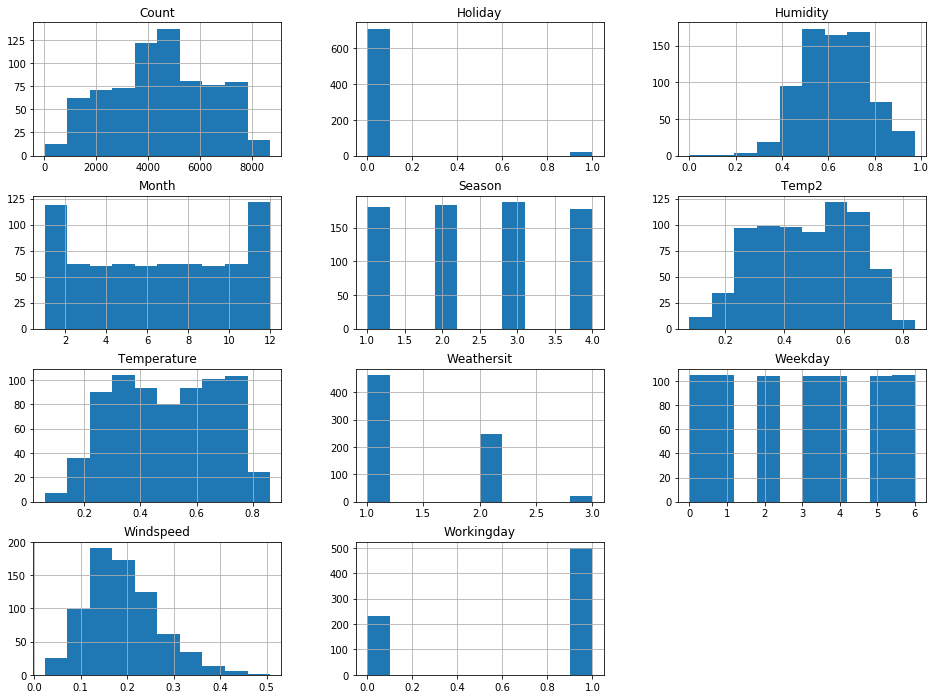

In [61]:
# Histograms for each attribute
entireDataset.hist()
pyplot.show()

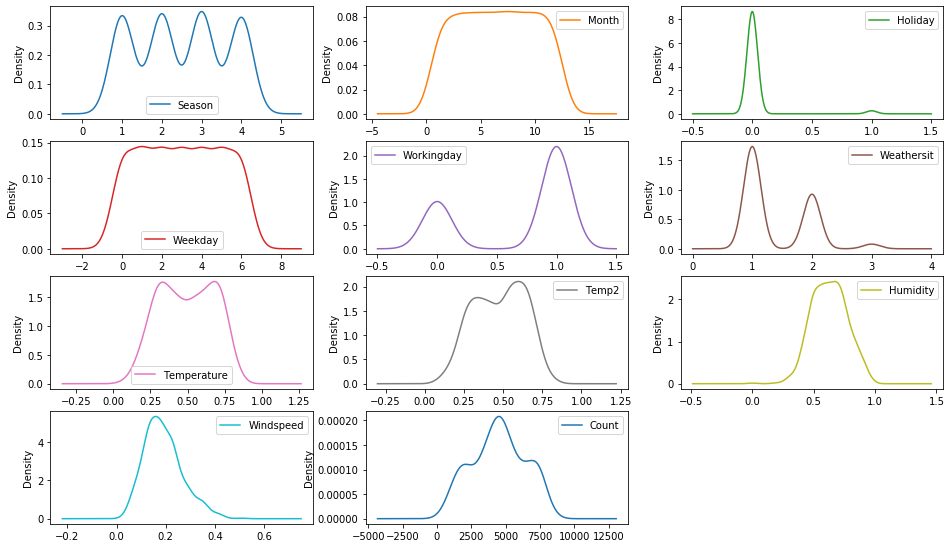

In [62]:
## Density plot for each attribute
entireDataset.plot(kind='density', subplots=True, layout=(dispRow,dispCol), sharex=False)
pyplot.show()


## Outliers Detection & Treatment

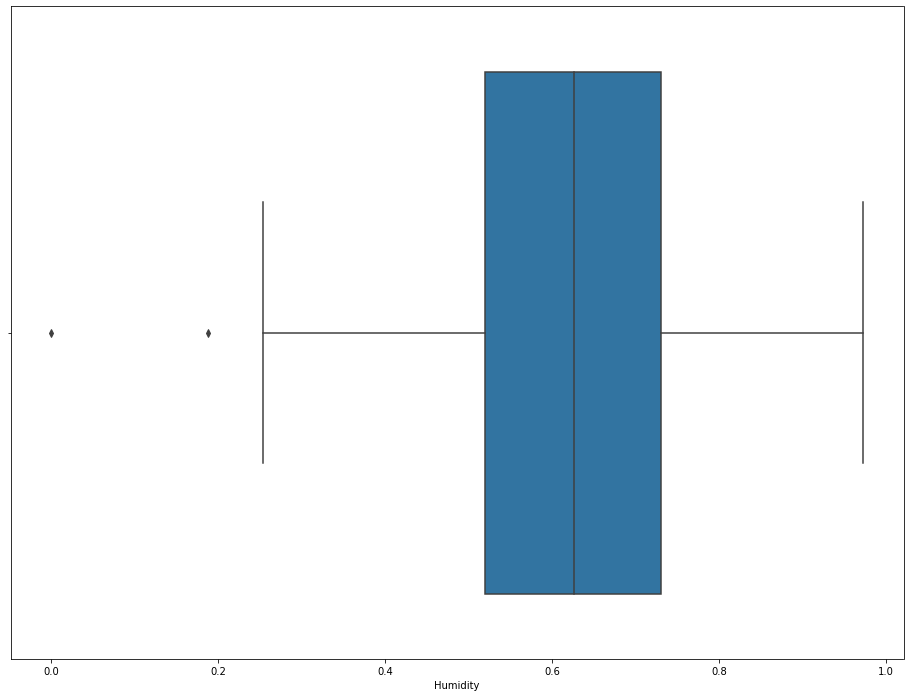

In [63]:
sns.boxplot('Humidity',data = entireDataset)

In [64]:
q1, q3 = np.percentile(entireDataset['Humidity'],[25,75])

In [65]:
IQR = q3-q1      
LTV = q1 - 1.5*IQR 
UTV = q3 + 1.5*IQR

In [66]:
q1,q3,IQR,LTV,UTV

(0.52, 0.7302085, 0.21020850000000002, 0.20468725, 1.0455212500000002)

In [67]:
entireDataset['Humidity'] = entireDataset['Humidity'].mask(entireDataset['Humidity']<UTV,UTV)

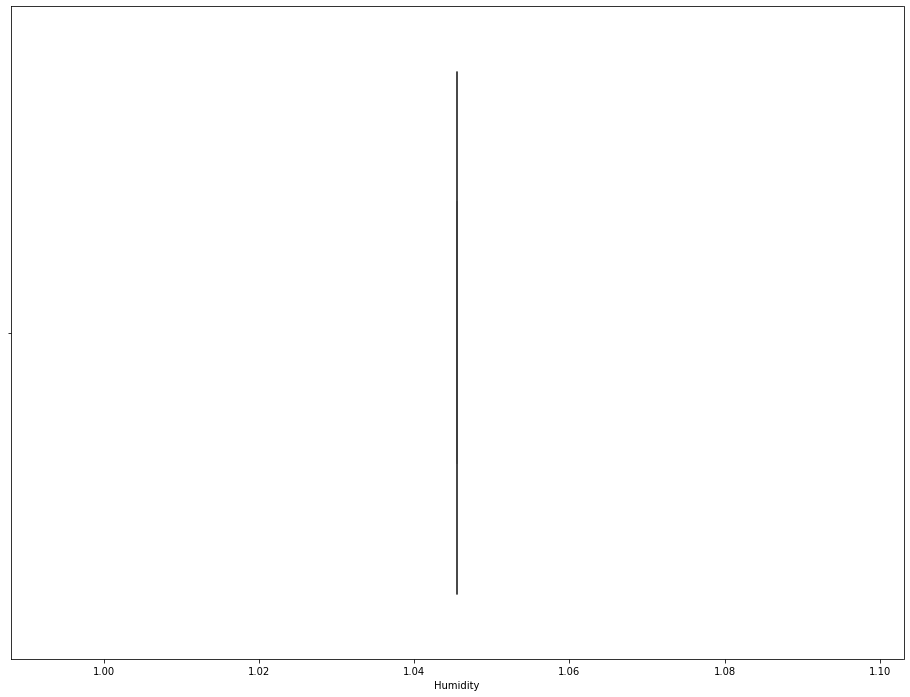

In [68]:
sns.boxplot('Humidity',data = entireDataset)

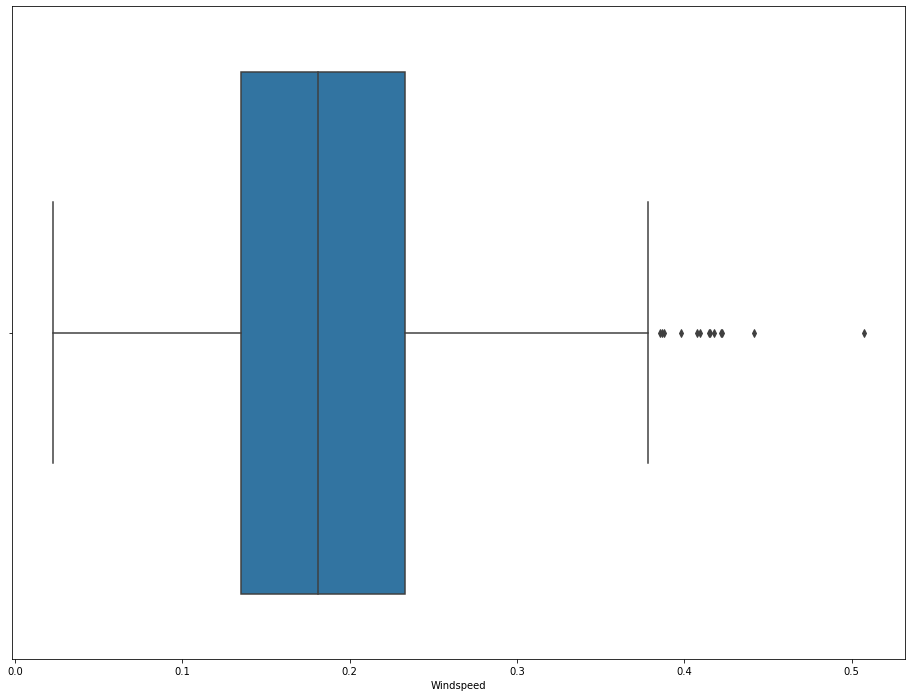

In [69]:
sns.boxplot('Windspeed',data = entireDataset)

In [70]:
q1, q3 = np.percentile(entireDataset['Windspeed'],[25,75])

In [71]:
IQR = q3-q1      
LTV = q1 - 1.5*IQR 
UTV = q3 + 1.5*IQR

In [72]:
q1,q3,IQR,LTV,UTV

(0.13495, 0.2332145, 0.0982645, -0.012446750000000034, 0.38061125)

In [73]:
entireDataset['Windspeed'] = entireDataset['Windspeed'].mask(entireDataset['Windspeed']>UTV,UTV)

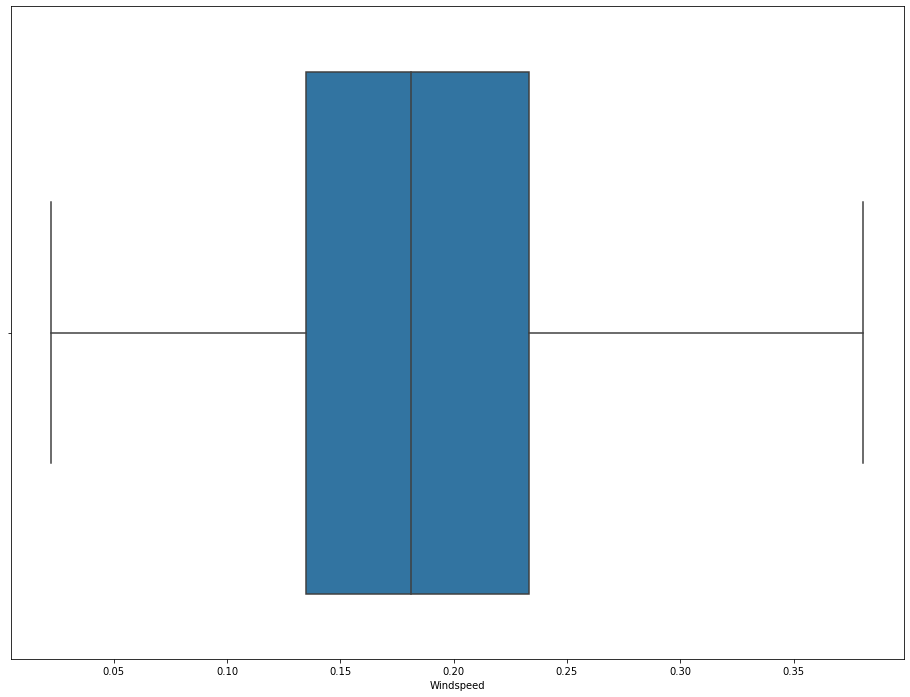

In [74]:
sns.boxplot('Windspeed',data = entireDataset)

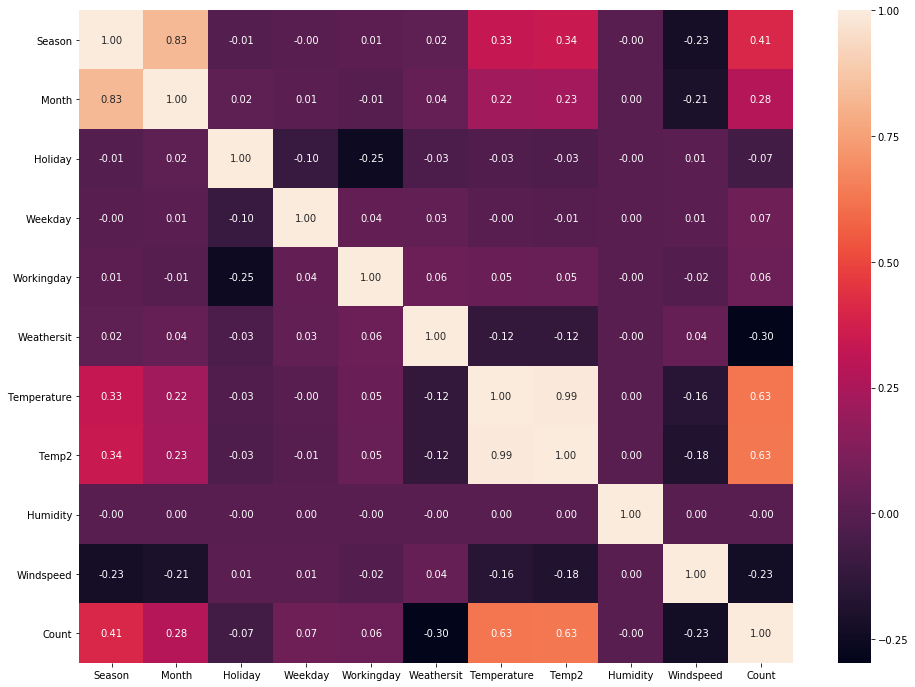

In [75]:
## Correlation matrix
# Calculate correlations
corr = entireDataset.corr()
# Heatmap
sns.heatmap(corr, annot=True, fmt=".2f")

In [76]:
entireDataset.fillna(-1, inplace=True)
entireDataset.head(20)

,Season,Month,Holiday,Weekday,Workingday,Weathersit,Temperature,Temp2,Humidity,Windspeed,Count
0,1,1,0,6,0,2,0.344167,0.363625,1.045521,0.160446,985
1,1,1,0,0,0,2,0.363478,0.353739,1.045521,0.248539,801
2,1,1,0,1,1,1,0.196364,0.189405,1.045521,0.248309,1349
3,1,1,0,2,1,1,0.200000,0.212122,1.045521,0.160296,1562
4,1,1,0,3,1,1,0.226957,0.229270,1.045521,0.186900,1600
5,1,1,0,4,1,1,0.204348,0.233209,1.045521,0.089565,1606
6,1,1,0,5,1,2,0.196522,0.208839,1.045521,0.168726,1510
7,1,1,0,6,0,2,0.165000,0.162254,1.045521,0.266804,959
8,1,1,0,0,0,1,0.138333,0.116175,1.045521,0.361950,822
9,1,1,0,1,1,1,0.150833,0.150888,1.045521,0.223267,1321


### Converting categorical variables

In [77]:
dummy_fields = ['Season', 'Weathersit', 'Holiday', 
                  'Weekday']
for each in dummy_fields:
    dummies = pd.get_dummies(entireDataset[each], prefix=each, drop_first=False)
    entireDataset = pd.concat([entireDataset, dummies], axis=1)

fields_to_drop = ['Season', 'Weathersit', 'Holiday', 
                  'Weekday']
entireDataset = entireDataset.drop(fields_to_drop, axis=1)
entireDataset.head()

,Month,Workingday,Temperature,Temp2,Humidity,Windspeed,Count,Season_1,Season_2,Season_3,...,Weathersit_3,Holiday_0,Holiday_1,Weekday_0,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6
0,1,0,0.344167,0.363625,1.045521,0.160446,985,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,1,0,0.363478,0.353739,1.045521,0.248539,801,1,0,0,...,0,1,0,1,0,0,0,0,0,0
2,1,1,0.196364,0.189405,1.045521,0.248309,1349,1,0,0,...,0,1,0,0,1,0,0,0,0,0
3,1,1,0.200000,0.212122,1.045521,0.160296,1562,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4,1,1,0.226957,0.229270,1.045521,0.186900,1600,1,0,0,...,0,1,0,0,0,0,1,0,0,0


In [78]:
entireDataset['Cnt'] = entireDataset['Count']

# testDataset.fillna(-1, inplace=True)
# testDataset.head(20)

In [79]:
entireDataset.drop(['Count'],axis=1,inplace=True)

In [80]:
entireDataset.rename(columns = {"Cnt": "Count"}, 
                                 inplace = True) 

In [81]:
entireDataset.head(2)

,Month,Workingday,Temperature,Temp2,Humidity,Windspeed,Season_1,Season_2,Season_3,Season_4,...,Holiday_0,Holiday_1,Weekday_0,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6,Count
0,1,0,0.344167,0.363625,1.045521,0.160446,1,0,0,0,...,1,0,0,0,0,0,0,0,1,985
1,1,0,0.363478,0.353739,1.045521,0.248539,1,0,0,0,...,1,0,1,0,0,0,0,0,0,801


In [82]:
seedNum = 777
totCol = len(entireDataset.columns)
array = entireDataset.values
X_train = array[:,0:totCol-1]
Y_train = array[:,totCol-1]
# totCol = len(testDataset.columns)
# array = testDataset.values
# X_validation = array[:,0:totCol-1]
# Y_validation = array[:,totCol-1]

print("X_train.shape: {} Y_train.shape: {}".format(X_train.shape, Y_train.shape))
#print("X_validation.shape: {} Y_validation.shape: {}".format(X_validation.shape, Y_validation.shape))
print ('Total time for data handling and visualization:',(datetime.now() - startTimeScript))


X_train.shape: (731, 22) Y_train.shape: (731,)
Total time for data handling and visualization: 0:00:43.258173


In [83]:
# data standardization
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
# X_validation = feature_scaler.transform(X_validation)

In [84]:
from sklearn.metrics import mean_squared_error, make_scorer
from math import sqrt
num_folds = 10
scoring = make_scorer(mean_squared_error)

# Set up Algorithms Spot-Checking Array
models = []
models.append(('LR', LinearRegression()))
models.append(('CART', DecisionTreeRegressor()))

models.append(('KNN', KNeighborsRegressor()))
models.append(('SVM', SVR()))

models.append(('RF', RandomForestRegressor()))

models.append(('AB', AdaBoostRegressor()))
models.append(('GBM', GradientBoostingRegressor()))
results = []
names = []
metrics = []

In [85]:
# Generate model in turn
for name, model in models:
    startTimeModule = datetime.now()
    kfold = KFold(n_splits=num_folds, random_state=seedNum)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=make_scorer(mean_squared_error))
    
    #scores = cross_validation.cross_val_score(regr, X_digits, Y_digits, scoring='mean_squared_error', cv=loo,)

    results.append(cv_results)
    names.append(name)
    metrics.append(cv_results.mean())
    error = sqrt(cv_results.mean()) #calculate rmse
    #rmse_val.append(error) #store rmse values
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    print ('Model training time:',(datetime.now() - startTimeModule))
    
   
    print('RMSE value is:', error)
   


LR: 3165440.592407 (918735.790168)
Model training time: 0:00:00.511707
RMSE value is: 1779.1685115263701
CART: 4737938.082636 (1121399.557008)
Model training time: 0:00:00.311820
RMSE value is: 2176.6805191934027
KNN: 3697850.933898 (1059401.824380)
Model training time: 0:00:00.177897
RMSE value is: 1922.9797018943843
SVM: 4195002.615815 (2998191.392174)
Model training time: 0:00:01.339233
RMSE value is: 2048.170553399952
RF: 4030315.270711 (1206453.928389)
Model training time: 0:00:01.441175
RMSE value is: 2007.564512216536
AB: 2778026.542803 (552958.314628)
Model training time: 0:00:03.880777
RMSE value is: 1666.7412945033036
GBM: 3836243.378680 (932071.043811)
Model training time: 0:00:02.806396
RMSE value is: 1958.6330382897256


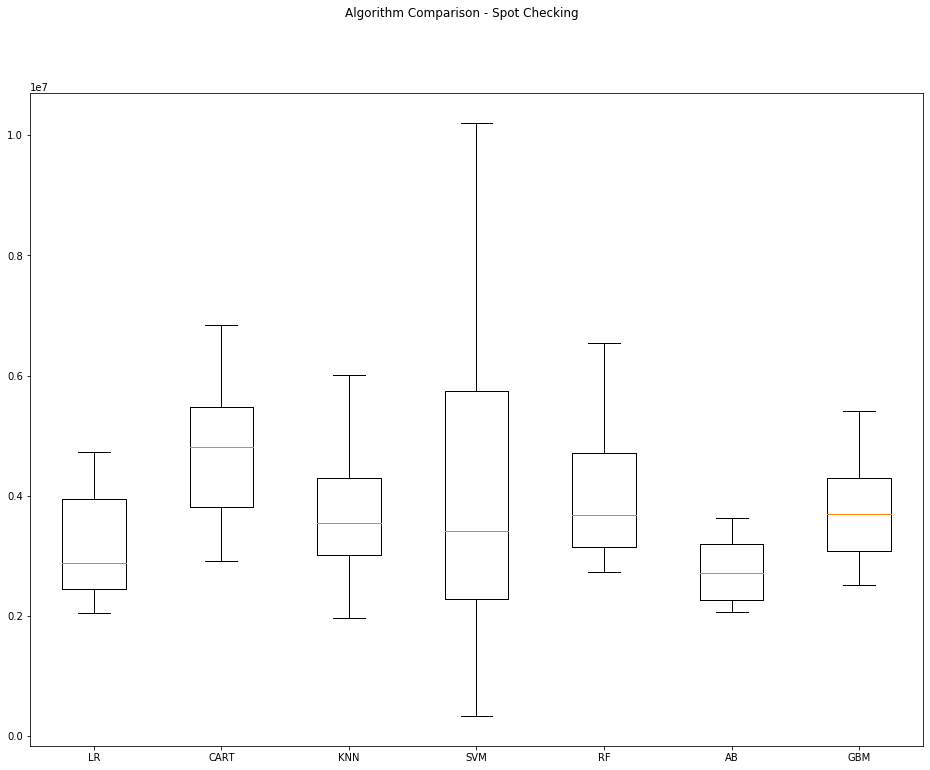

In [86]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison - Spot Checking')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [87]:
results = []
names = []

# Tuning algorithm #1 - AdaBoost
startTimeModule = datetime.now()
paramGrid4 = dict(n_estimators=np.array([500,600,700,800,900]))
model4 = AdaBoostRegressor(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
# finds the best parameters for the model
grid4 = GridSearchCV(estimator=model4, param_grid=paramGrid4, scoring=scoring, cv=kfold)
grid_result4 = grid4.fit(X_train, Y_train)

In [88]:
print("Best: %f using %s" % (grid_result4.best_score_, grid_result4.best_params_))

Best: 2727916.599808 using {'n_estimators': 500}


In [89]:
results.append(grid_result4.cv_results_['mean_test_score'])
names.append('AB')
means = grid_result4.cv_results_['mean_test_score']
stds = grid_result4.cv_results_['std_test_score']
params = grid_result4.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))

2727916.599808 (819216.905889) with: {'n_estimators': 500}
2727916.599808 (819216.905889) with: {'n_estimators': 600}
2727916.599808 (819216.905889) with: {'n_estimators': 700}
2727916.599808 (819216.905889) with: {'n_estimators': 800}
2727916.599808 (819216.905889) with: {'n_estimators': 900}
Model training time: 0:00:29.548066


In [90]:
Y_train.shape

(731,)

In [91]:

# Tuning algorithm #2 - Stochastic Gradient Boosting
startTimeModule = datetime.now()
paramGrid5 = dict(n_estimators=np.array([400,500,600,700,800]))
model5 = GradientBoostingRegressor(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid5 = GridSearchCV(estimator=model5, param_grid=paramGrid5, scoring=scoring, cv=kfold)
grid_result5 = grid5.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result5.best_score_, grid_result5.best_params_))


Best: 4266476.125101 using {'n_estimators': 800}


In [92]:
results.append(grid_result5.cv_results_['mean_test_score'])
names.append('GBM')
means = grid_result5.cv_results_['mean_test_score']
stds = grid_result5.cv_results_['std_test_score']
params = grid_result5.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))


4143822.198128 (949261.441461) with: {'n_estimators': 400}
4206175.430117 (940939.498972) with: {'n_estimators': 500}
4230991.185077 (938250.528568) with: {'n_estimators': 600}
4246243.653276 (940620.478186) with: {'n_estimators': 700}
4266476.125101 (945992.357399) with: {'n_estimators': 800}
Model training time: 0:01:26.495385


In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 1)

In [94]:
# Linear Regression

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6059874927462122

In [95]:
# import the Decision Tree regressor 
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
regressor_dec = DecisionTreeRegressor()  
  
# fit the regressor with X and Y data 
regressor_dec.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor_dec.predict(X_test)

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.29792587380779134

In [96]:
# KNN

from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 1720.7624378010285
RMSE value for k=  2 is: 1506.1335477325517
RMSE value for k=  3 is: 1505.1835751363242
RMSE value for k=  4 is: 1463.3821852366616
RMSE value for k=  5 is: 1427.0303629813725
RMSE value for k=  6 is: 1429.3072806545567
RMSE value for k=  7 is: 1418.1667751299442
RMSE value for k=  8 is: 1434.5446592784365
RMSE value for k=  9 is: 1417.1612912101582
RMSE value for k=  10 is: 1443.1419695767086
RMSE value for k=  11 is: 1439.2105524683707
RMSE value for k=  12 is: 1430.321176548785
RMSE value for k=  13 is: 1437.8372728321356
RMSE value for k=  14 is: 1423.8644066780896
RMSE value for k=  15 is: 1398.9504524698536
RMSE value for k=  16 is: 1408.177029617418
RMSE value for k=  17 is: 1414.3717204484349
RMSE value for k=  18 is: 1408.947657723517
RMSE value for k=  19 is: 1402.1917224173244
RMSE value for k=  20 is: 1384.8855259919646


In [97]:
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.48102360934404376

In [98]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100)
# regr.fit(X, y) 


regr.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regr.predict(X_test)

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5707599917035355

In [99]:
# Adaboost

from sklearn.ensemble import AdaBoostRegressor

regr_ada = AdaBoostRegressor(random_state=seedNum)
# regr.fit(X, y) 


regr_ada.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regr_ada.predict(X_test)

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)



0.594703406379266

In [100]:
from sklearn.ensemble import GradientBoostingRegressor

regr_gbr = GradientBoostingRegressor(random_state=seedNum)

regr_gbr.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regr_gbr.predict(X_test)

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.628803905615517